In [1]:
#进行主要的部分
#Flody算法的时间复杂度为O(n^3)，第一重循环的意义是分别对加入每个点后进行更新
#第二、三重循环的意义是对整个矩阵中的数据进行一次更新与遍历，意义为在加入该点后，是否能找到更简单的路径
##vals为距离矩阵
def flody(vals):
    length = np.shape(vals)[0]
    for i in range(length):
        for j in range(length):
            for k in range(length):
                test_length =vals[j][i]+vals[i][k]
                if test_length < vals[j][k]:vals[j][k] =test_length   
    return vals
#进行数据可视化部分(表格形式）
#定义一个函数，输入矩阵后就可以输出一个可视化表格，函数名为drawtable
import matplotlib.pyplot as plt
def drawtable(vals):
    fig,ax = plt.subplots()
    #将轴藏起
    ax.spines['top'].set_visible(False)    
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)    
    #对表格设置数据
    length = np.shape(vals)[0]   #使用np.shape(var)的方法可以返回数组的长度
    ##表头数据
    col_labels = np.linspace(1,length,length,dtype = int)  #linspace(初始值，末尾值，个数)
    row_labels = np.linspace(1,length,length,dtype = int)
    table_vals = vals
    my_table = plt.table(cellText = table_vals,loc = 'best',rowLabels = row_labels,colLabels = col_labels)
    plt.show()
    return 0
import numpy as np
#该部分为
length_m = np.array([[0,2,6,4,8],[999,0,3,999,999],[7,999,0,1,11],[5,999,12,0,999],[6,10,4,7,0]])
#说明，方向为由row->col计数,若为999，则视为无穷大，断路

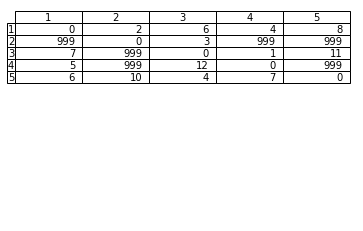

In [3]:
#进行图片化的可视化部分（图片形式）
##运行该部分的主函数可以对距离的矩阵进行可视化，利用turtle库实现
import turtle 
import copy
import math
#首先画出n个点，并进行标号
##首先定义一个画点函数：
###输入为画笔、坐标、点半径
def point(p,loc,length,num):
    p.penup()
    p.setx(loc[0])
    p.sety(loc[1])
    p.pendown()
    p.pencolor('black')
    p.dot(length)
    color = 'red'
    edge = length*3/5
    drawnum_base(p,loc,edge,num, color)
    return 0
##定义一个基础画数字函数，是基于九宫格进行绘制
###p为画笔 loc为中心位置 edge为九宫格边长 num为绘制的数字 仅能输入0~9,color为绘制的颜色
def drawnum_base(p,loc,edge,num,color):
    halfpath = edge/2
    p.pencolor(color)
    p.penup()
    if num ==1: 
        p.home()
        p.setx(loc[0])
        p.sety(loc[1]+halfpath)
        p.down()
        p.right(90)
        p.forward(2*halfpath)
    if num ==2:
        p.home()
        p.setx(loc[0]-halfpath)
        p.sety(loc[1]+halfpath)
        p.down()
        p.forward(2*halfpath)
        p.right(90)
        p.forward(halfpath)
        p.right(90)
        p.forward(2*halfpath)
        p.left(90)
        p.forward(halfpath)
        p.left(90)
        p.forward(2*halfpath)
    if num ==3:
        p.home()
        p.setx(loc[0]-halfpath)
        p.sety(loc[1]+halfpath)
        p.pendown()
        p.forward(2*halfpath)
        p.right(90)
        p.forward(halfpath)
        p.penup()
        p.home()
        p.setx(loc[0]-halfpath)
        p.sety(loc[1])
        p.pendown()
        p.forward(2*halfpath)
        p.right(90)
        p.forward(halfpath)
        p.right(90)
        p.forward(2*halfpath)
    if num == 4:
        p.home()
        p.setx(loc[0]-halfpath)
        p.sety(loc[1]+halfpath)
        p.down()
        p.right(90)
        p.forward(halfpath)
        p.left(90)
        p.forward(2*halfpath)
        p.setx(loc[0])
        p.sety(loc[1]+halfpath)
        p.right(90)
        p.forward(2*halfpath)
    if num ==5:
        p.home()
        p.setx(loc[0]+halfpath)
        p.sety(loc[1]+halfpath)
        p.down()
        p.right(180)
        p.forward(2*halfpath)
        p.left(90)
        p.forward(halfpath)
        p.left(90)
        p.forward(2*halfpath)
        p.right(90)
        p.forward(halfpath)
        p.right(90)
        p.forward(2*halfpath)
    if num == 6:
        p.home()
        p.setx(loc[0]-halfpath)
        p.sety(loc[1]+halfpath)
        p.down()
        p.right(90)
        p.forward(2*halfpath)
        p.left(90)
        p.forward(2*halfpath)
        p.left(90)
        p.forward(halfpath)
        p.left(90)
        p.forward(2*halfpath)
    if num == 7:
        p.home()
        p.setx(loc[0]-halfpath)
        p.sety(loc[1]+halfpath)
        p.down()
        p.forward(2*halfpath)
        p.right(90)
        p.forward(2*halfpath)
    if num==8:
        p.home()
        p.setx(loc[0]-halfpath)
        p.sety(loc[1]+halfpath)
        p.down()
        p.forward(2*halfpath)
        p.right(90)
        p.forward(2*halfpath)
        p.right(90)
        p.forward(2*halfpath)
        p.right(90)
        p.forward(2*halfpath)
        p.sety(loc[1])
        p.right(90)
        p.forward(2*halfpath)
    if num ==9:
        p.home()
        p.setx(loc[0]+halfpath)
        p.sety(loc[1]-halfpath)
        p.down()
        p.left(90)
        p.forward(2*halfpath)
        p.left(90)
        p.forward(2*halfpath)
        p.left(90)
        p.forward(halfpath)
        p.left(90)
        p.forward(2*halfpath)
    if num == 0:
        p.home()
        p.setx(loc[0]-halfpath)
        p.sety(loc[1]+halfpath)
        p.down()
        p.forward(2*halfpath)
        p.right(90)
        p.forward(2*halfpath)
        p.right(90)
        p.forward(2*halfpath)
        p.right(90)
        p.forward(2*halfpath)
##定义一个强化画数字函数，可以画两位数。
###p为画笔 loc为数字的中心位置,edge控制数字的大小 num为绘制的数字；color控制绘制数字的颜色
def drawnum_2(p,loc,edge,num,color):
    if num <10: drawnum_base(p,loc,edge,num,color)
    if num >=10 and num<100: 
        loc1= copy.deepcopy(loc)
        loc1[0] = loc[0] -edge
        loc2 = copy.deepcopy(loc)
        loc2[0] = loc[0] +edge
        num_base = num%10
        num_ten = (num-num_base)/10
        #开始绘图
        drawnum_base(p,loc1,edge,num_ten,color)
        drawnum_base(p,loc2,edge,num_base,color)
##定义一个绘制箭头函数
###p为画笔，loc1,loc2为始末位置,step决定箭头的大小,color为箭头的颜色
def drawarrow(p,loc1,loc2,step,color):
    loc_med = [(loc1[0]*4 + loc2[0]*1)/5,(loc1[1]*4 + loc2[1]*1)/5]
    if loc2[0] - loc1[0] == 0: angel =90
    else:
        tan = (loc2[1]-loc1[1])/(loc2[0]-loc1[0])
        cos_flag = (loc2[0]-loc1[0])
        sin_flag = (loc2[1]-loc1[1])
        angel = math.atan(tan)/3.14 *180        
    flag = loc1[1]
    p.penup()
    p.home()
    p.setx(loc_med[0])
    p.sety(loc_med[1])
    p.pendown()
    p.pencolor(color)
    p.left(angel)
    if cos_flag < 0: p.left(180)
    p.left(120)
    p.forward(step)
    p.back(step)
    p.left(120)
    p.forward(step)
    if cos_flag ==0:
        if sin_flag < 0:p.left(180)
        p.left(120)
        p.forward(step)
        p.back(step)
        p.left(120)
        p.forward(step) 
##定义一个画线段函数，能够绘制出任意两点间的方向并表明大小
###p为画笔，loc1为点1的位置，loc2为点2的位置，num为绘制的数字（若超出0~100区间则不绘制）,
###color1为线条颜色，color2为数字颜色，color3为箭头颜色
def drawline(p,loc1,loc2,num,color1,color2,color3):
    if  num<100 and num>0:
        p.penup()
        p.setx(loc1[0])
        p.sety(loc1[1])
        p.pendown()
        p.pencolor(color1)
        loc_med = [(loc1[0]*4 + loc2[0]*1)/5,(loc1[1]*4 + loc2[1]*1)/5]
        p.goto(loc_med[0],loc_med[1])
        #绘制箭头
        drawarrow(p,loc1,loc2,30,color3)
        drawnum_2(p,loc_med,20,num,color2)
        p.penup()
        p.setx(loc_med[0])
        p.sety(loc_med[1])
        p.pendown()
        p.pencolor(color1)
        p.goto(loc2[0],loc2[1])
#首先批量化画出点，以5个点为例
##n为个数 matrix为距离矩阵，dot_distance为点距离，dot_d为点直径
def drawall(p,n,matrix,dot_distance,dot_d):
    locList = []
    for i in range(n):
        angel = (i+1)*math.radians(360/n)
        x = dot_distance*math.sin(angel)
        y = dot_distance*math.cos(angel)
        locList.append([x,y])
    pathlist = []
    for i in range(n):
        for m in range(n):
            if m+1 != i+1:       
                pathlist.append([i+1,m+1])
    #绘制点的部分
    t = 1;
    for i in locList:
        point(p,i,dot_d,t)
        t = t+1  
    #绘制边的部分
    for i in pathlist:
        tem_1 = i[0]-1
        tem_2 = i[1]-1
        loc1 = locList[tem_1]
        loc2 = locList[tem_2]
        num = matrix[tem_1][tem_2]
        drawline(p,loc1,loc2,num,'black','red','blue')
turtle.screensize(canvwidth=None,canvheight=None,bg=None)
p = turtle.Pen()
p.speed(10)
#主函数
n = 5
length = 300
dot_d = 50
matrix = length_m
#主函数
drawtable(length_m)
drawall(p,n,matrix,length,dot_d)
turtle.done()

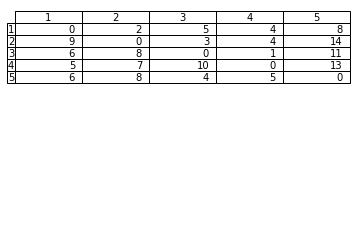

0

In [24]:
out = flody(length_m)
drawtable(out)